<a href="https://colab.research.google.com/github/nelslindahlx/KnowledgeReduce/blob/main/CivicHonorsGEXFGraphML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Code Overview

The updated Python code is designed to run in Google Colab and efficiently processes web content to create a knowledge graph. The significant enhancement in this version is its capability to save the knowledge graph in both GraphML and GEXF formats, catering to different graph analysis tools' compatibility. Here's a summary of the code's main components and workflow:

### 1. **Library Installation and Imports**
   - The script begins with installing and importing necessary libraries for web scraping (`requests`, `BeautifulSoup`), natural language processing (`nltk`, `spacy`, `textblob`), and graph creation and manipulation (`networkx`).
   - It downloads NLTK resources and loads Spacy's English model for performing various NLP tasks.

### 2. **Function Definitions**
   - `fetch_webpage_content(url)`: Retrieves HTML content from a specified URL with robust error handling for HTTP issues.
   - `parse_webpage_content(content)`: Parses HTML content to extract text, then uses NLP techniques for entity recognition, sentiment analysis, and keyword extraction, ensuring the extraction of meaningful information.
   - `knowledge_reduce(entities, sentiment, keyword_freq)`: Constructs a knowledge graph using NetworkX, where nodes represent entities and keywords, and edges represent their relationships. The graph also includes sentiment data.
   - `save_knowledge_graph_graphml(graph, file_name)`: Saves the knowledge graph in the GraphML format, which is widely supported by graph visualization tools.
   - `save_knowledge_graph_gexf(graph, file_name)`: Additionally saves the knowledge graph in the GEXF format, offering compatibility with different graph analysis applications.

### 3. **Execution Flow**
   - **Fetching Webpage Content**: The code begins by fetching content from the specified webpage.
   - **Parsing Webpage Content**: The fetched content is parsed to extract entities, sentiment, and keywords.
   - **Creating and Saving the Knowledge Graphs**: A knowledge graph is generated from the parsed data and is saved in both GraphML and GEXF formats, providing versatility for subsequent analysis and visualization.

The final output of this script are two files - one in GraphML and another in GEXF format - each representing the knowledge graph. This approach enhances the applicability of the script, as the knowledge graph can be analyzed and visualized in a wider range of tools, making it a versatile solution for data analysts, researchers, or anyone interested in graph-based representations of web content.

# Step 1: Install and Import Libraries

In [1]:
!pip install nltk spacy textblob
import requests
from bs4 import BeautifulSoup
import networkx as nx
import nltk
import spacy
from textblob import TextBlob
from nltk.corpus import stopwords
from collections import Counter
import string
import matplotlib.pyplot as plt

nltk.download('punkt')
nltk.download('stopwords')
nlp = spacy.load('en_core_web_sm')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Step 2: Define Functions

In [2]:
def fetch_webpage_content(url):
    try:
        response = requests.get(url)
        response.raise_for_status()
        return response.text
    except requests.exceptions.HTTPError as e:
        raise Exception(f"HTTP Error: {e}")
    except Exception as e:
        raise Exception(f"Error fetching webpage: {e}")

def parse_webpage_content(content):
    soup = BeautifulSoup(content, 'html.parser')
    text_content = soup.get_text()

    doc = nlp(text_content)
    entities = [(ent.text.strip(), ent.label_) for ent in doc.ents if ent.text.strip()]

    blob = TextBlob(text_content)
    sentiment = blob.sentiment

    words = [word.lower() for word in nltk.word_tokenize(text_content)
             if word.lower() not in stopwords.words('english')
             and word not in string.punctuation]
    keyword_freq = Counter(words).most_common(10)

    return entities, sentiment, keyword_freq

def knowledge_reduce(entities, sentiment, keyword_freq):
    graph = nx.Graph()

    for entity, type in entities:
        graph.add_node(entity, type=str(type), label=str(entity))

    for word, freq in keyword_freq:
        graph.add_node(word, type='keyword', frequency=str(freq), label=str(word))

    sentiment_data = f"Polarity: {sentiment.polarity}, Subjectivity: {sentiment.subjectivity}"
    graph.graph['sentiment'] = sentiment_data

    for entity, _ in entities:
        for word, _ in keyword_freq:
            if word in entity:
                graph.add_edge(entity, word)

    return graph

def save_knowledge_graph_graphml(graph, file_name):
    nx.write_graphml(graph, file_name)

def save_knowledge_graph_gexf(graph, file_name):
    nx.write_gexf(graph, file_name)

# Step 3: Fetch Webpage Content

In [3]:
url = "https://civichonors.com/"
try:
    content = fetch_webpage_content(url)
    print("Webpage content fetched successfully.")
except Exception as e:
    print(f"Error fetching webpage: {e}")

Webpage content fetched successfully.


# Step 4: Parse the Webpage Content

In [4]:
try:
    entities, sentiment, keywords = parse_webpage_content(content)
    print("Webpage content parsed successfully.")
except Exception as e:
    print(f"Error parsing webpage content: {e}")

Webpage content parsed successfully.


# Step 5: Create and Save the Knowledge Graphs

In [5]:
try:
    graph = knowledge_reduce(entities, sentiment, keywords)
    save_knowledge_graph_graphml(graph, '/content/knowledge_graph.graphml')
    save_knowledge_graph_gexf(graph, '/content/knowledge_graph.gexf')
    print("Knowledge graphs created and saved in both GraphML and GEXF formats successfully.")
except Exception as e:
    print(f"Error creating or saving knowledge graphs: {e}")

Knowledge graphs created and saved in both GraphML and GEXF formats successfully.


# Step 6: Test the Knowledge Graphs

Testing graph from /content/knowledge_graph.graphml:
 - Number of nodes: 268
 - Number of edges: 0


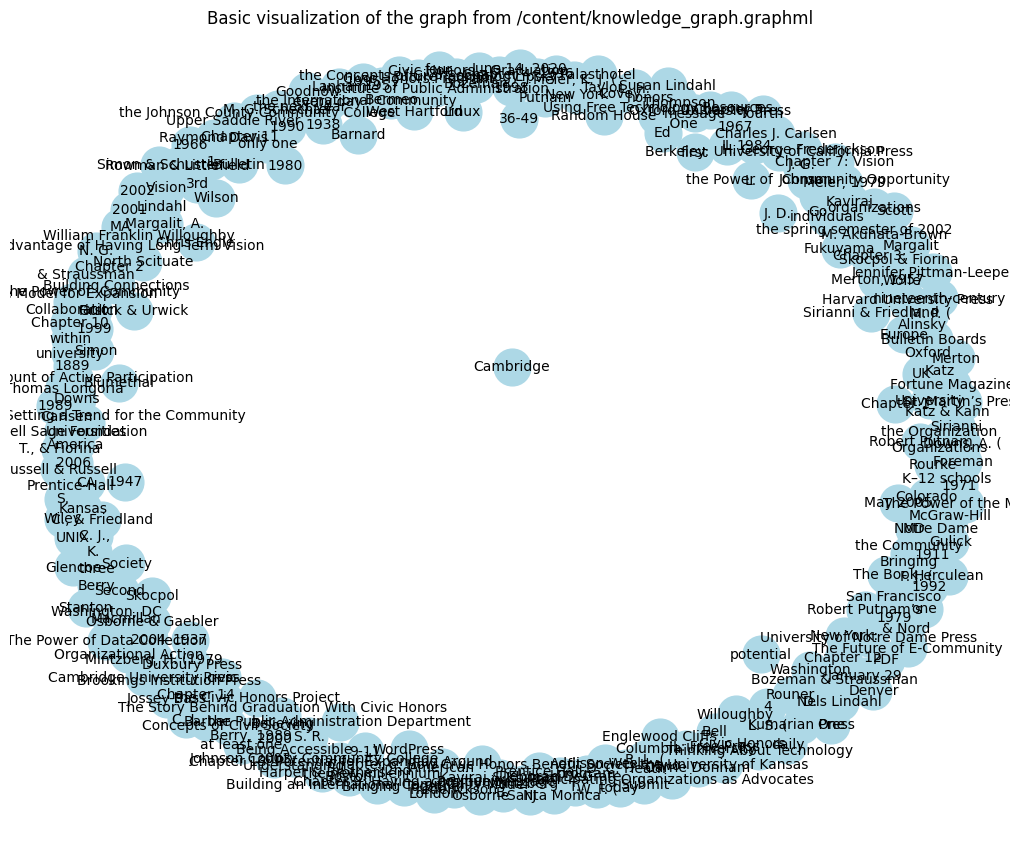

Testing graph from /content/knowledge_graph.gexf:
 - Number of nodes: 268
 - Number of edges: 0


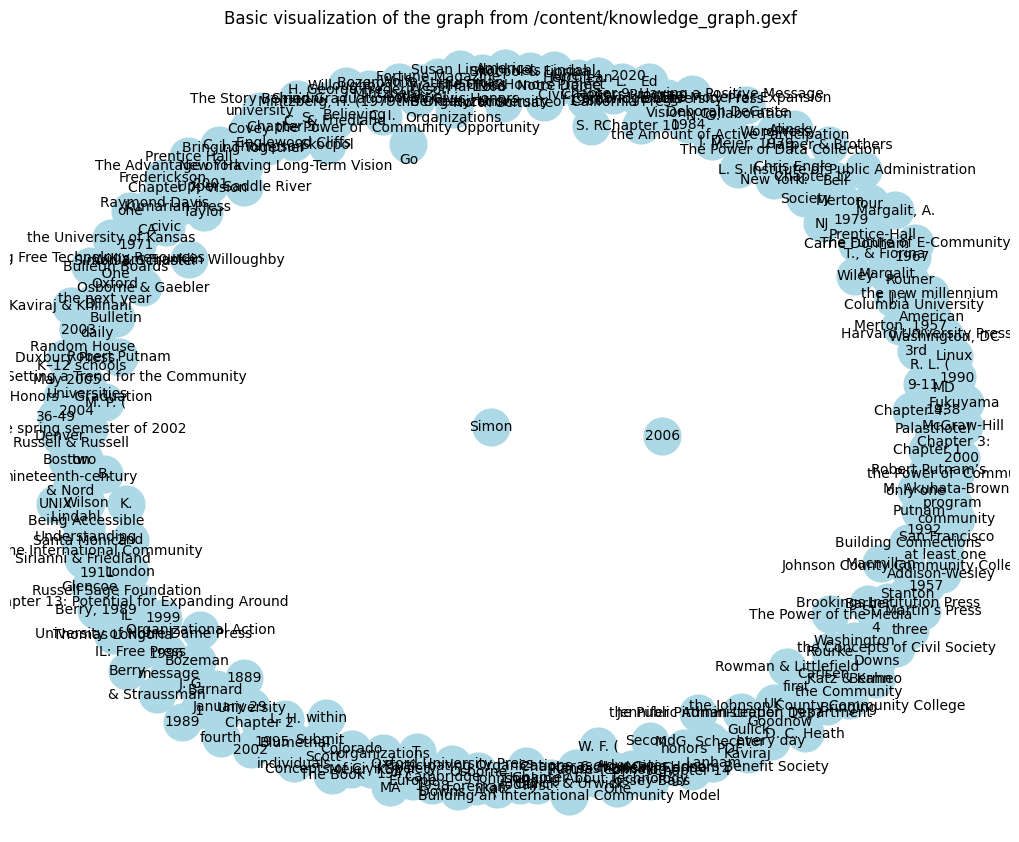

In [6]:
# Function to load and test a graph
def test_knowledge_graph(file_name):
    try:
        # Load the graph
        graph = nx.read_graphml(file_name) if file_name.endswith('.graphml') else nx.read_gexf(file_name)

        # Basic checks
        print(f"Testing graph from {file_name}:")
        print(f" - Number of nodes: {graph.number_of_nodes()}")
        print(f" - Number of edges: {graph.number_of_edges()}")

        # Plot the graph (basic visualization)
        plt.figure(figsize=(10, 8))
        nx.draw(graph, with_labels=True, node_size=700, node_color="lightblue", font_size=10)
        plt.title(f"Basic visualization of the graph from {file_name}")
        plt.show()

    except Exception as e:
        print(f"Error testing graph: {e}")

# Test both the GraphML and GEXF graphs
test_knowledge_graph('/content/knowledge_graph.graphml')
test_knowledge_graph('/content/knowledge_graph.gexf')